In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


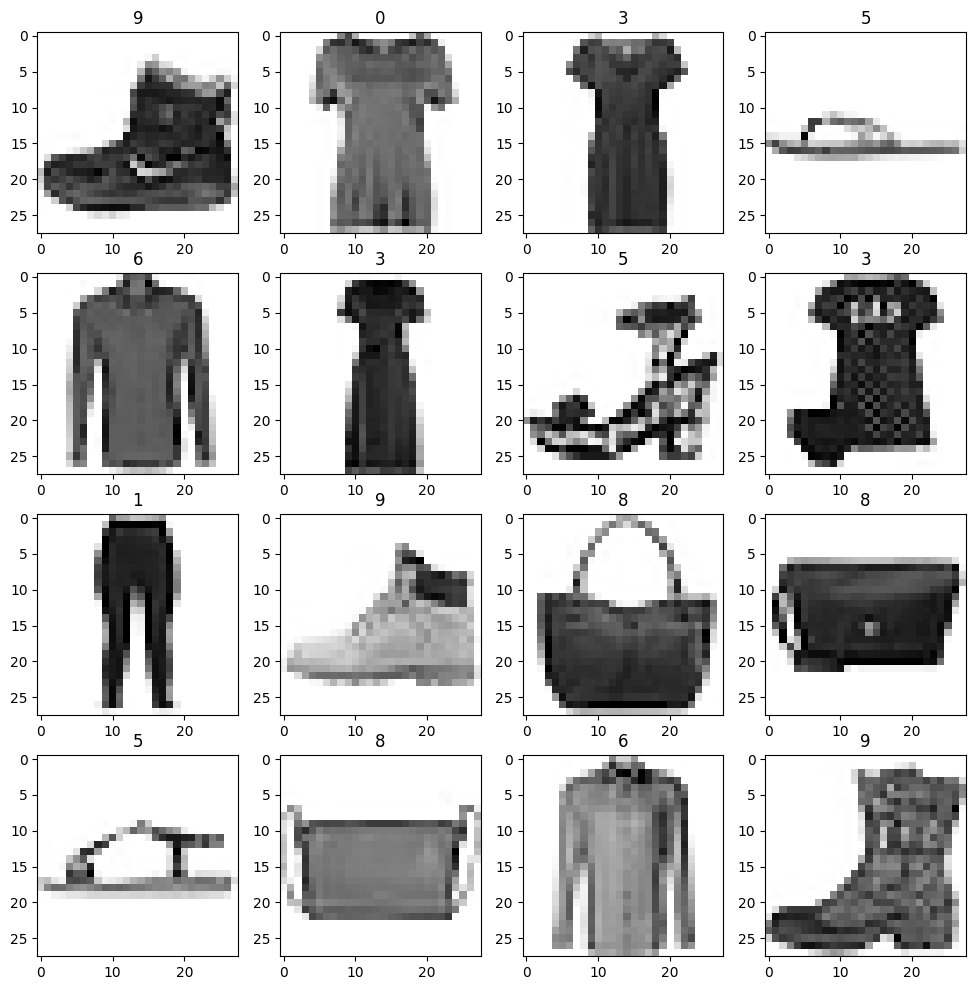

In [2]:
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
steps = 10
acum = 0
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(train_images[acum], cmap = 'Greys')
        ax[i][j].set_title(train_labels[acum])
        acum += steps

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 10, input_shape = (28, 28, 1)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32, 5),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(25, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 19, 19, 64)        6464      
                                                                 
 re_lu (ReLU)                (None, 19, 19, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 32)          51232     
                                                                 
 re_lu_1 (ReLU)              (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                        

In [4]:
train_log = model.fit(train_images, train_labels, 
    epochs = 7,
    validation_data = (test_images, test_labels))

Epoch 1/7
1875/1875 [==============================] - 22s 11ms/step - loss: 0.6442 - accuracy: 0.7796 - val_loss: 0.4735 - val_accuracy: 0.8322
Epoch 2/7
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4315 - accuracy: 0.8450 - val_loss: 0.4238 - val_accuracy: 0.8499
Epoch 3/7
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3867 - accuracy: 0.8606 - val_loss: 0.4007 - val_accuracy: 0.8601
Epoch 4/7
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3607 - accuracy: 0.8691 - val_loss: 0.4409 - val_accuracy: 0.8485
Epoch 5/7
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3424 - accuracy: 0.8752 - val_loss: 0.3817 - val_accuracy: 0.8584
Epoch 6/7
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3257 - accuracy: 0.8818 - val_loss: 0.3637 - val_accuracy: 0.8689
Epoch 7/7
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3148 - accuracy: 0.8842 - val_loss: 0.3751 - val_ac

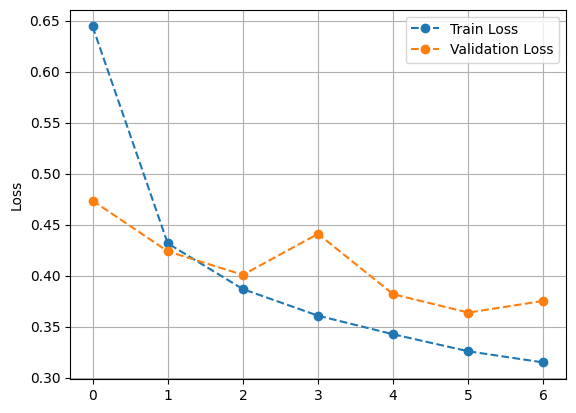

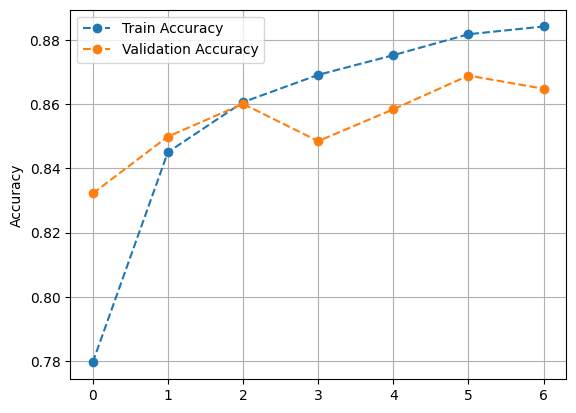

In [5]:
fig = plt.figure()
plt.plot(train_log.history['loss'], label = 'Train Loss', linestyle = '--', marker = 'o')
plt.plot(train_log.history['val_loss'], label = 'Validation Loss', linestyle = '--', marker = 'o')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure()
plt.plot(train_log.history['accuracy'], label = 'Train Accuracy', linestyle = '--', marker = 'o')
plt.plot(train_log.history['val_accuracy'], label = 'Validation Accuracy', linestyle = '--', marker = 'o')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy : ', "{:0.2%}".format(test_acc))
prediction = model.predict(test_images)


313/313 [==============================] - 1s 3ms/step - loss: 0.3751 - accuracy: 0.8648
Test accuracy :  86.48%
313/313 [==============================] - 1s 3ms/step


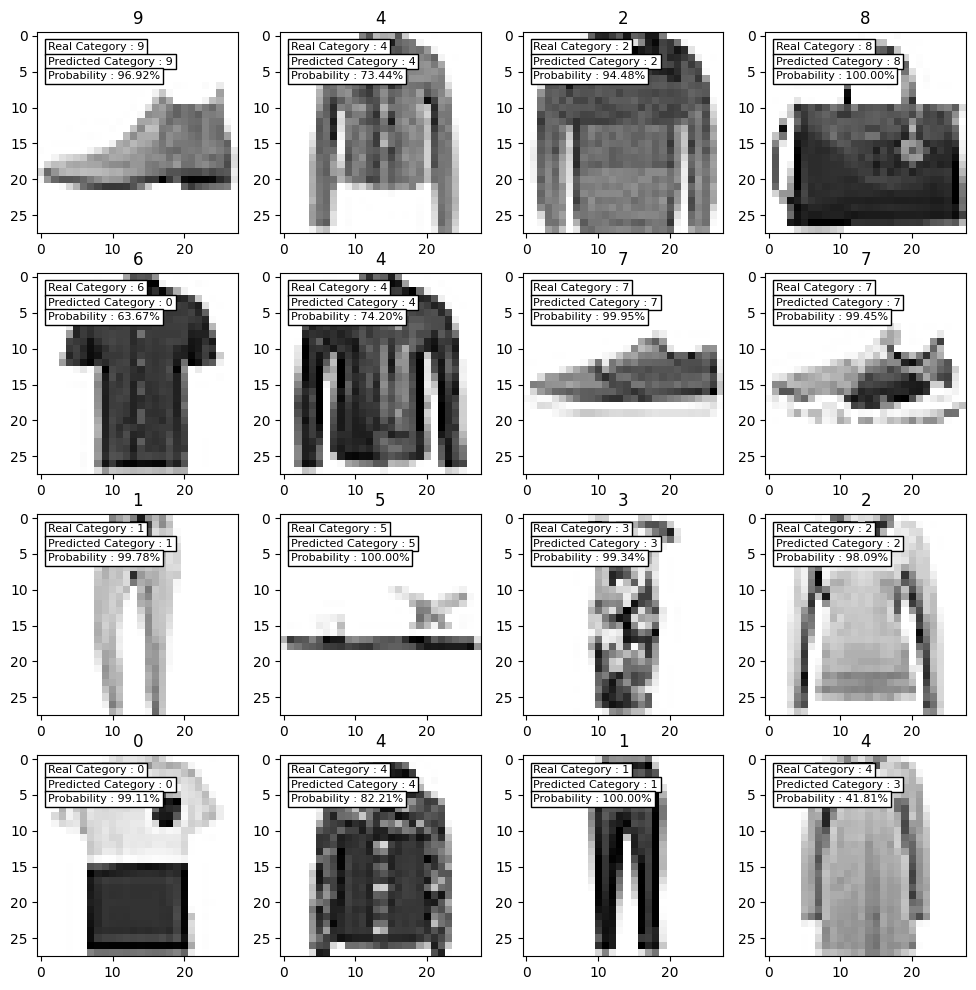

In [7]:
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
steps = 10
acum = 0
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(test_images[acum], cmap = 'Greys')
        ax[i][j].set_title(test_labels[acum])
        ax[i][j].text(1, 2, 'Real Category : ' + str(test_labels[acum]), fontsize = 8, bbox = {'facecolor': 'white', 'pad': 2})
        ax[i][j].text(1, 4, 'Predicted Category : ' + str(np.argmax(prediction[acum])), fontsize = 8, bbox = {'facecolor': 'white', 'pad': 2})
        ax[i][j].text(1, 6, 'Probability : ' + "{0:0.2%}".format(max(prediction[acum])), fontsize = 8, bbox = {'facecolor': 'white', 'pad': 2})
        acum += steps

In [9]:
# print(type(model.weights[9].scatter_max()))
# print(model.trainable_weights[9].__dict__)
# print(dir(model.trainable_weights[9]))
# variables = model.trainable_variables
n = 2
for i in range(10):
    print(model.trainable_variables[i].numpy().shape)
print(model.trainable_variables[0].numpy()[0])

(10, 10, 1, 64)
(64,)
(5, 5, 64, 32)
(32,)
(800, 50)
(50,)
(50, 25)
(25,)
(25, 10)
(10,)
<class 'numpy.ndarray'>
